In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [8]:
data=pd.read_csv("/content/drive/MyDrive/datasets/Tweet_NFT.xlsx - Sheet1.csv")


In [97]:
data1=pd.read_csv("/content/drive/MyDrive/datasets/Tweet_NFT.xlsx - Sheet1.csv")

In [9]:
test_data=data.loc[data["tweet_intent"].isnull()]

In [10]:
data=data.dropna(axis=0)

In [11]:
data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [13]:
data["tweet_intent"].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["tweet_intent"]=le.fit_transform(data["tweet_intent"])

In [15]:
le.classes_

array(['Appreciation', 'Community', 'Done', 'Giveaway', 'Interested',
       'Launching Soon', 'Presale', 'Whitelist', 'pinksale'], dtype=object)

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
#words__= set(nltk.corpus.words.words())
#stop_words=set(stopwords.words("English"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def clean_text(d):
    return ' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",d).split())

In [22]:
def cleaner(d):
    #apply cleaning like removing links, hashtags,  tagging
    d=clean_text(d)
    #word_tokenize and convert into lower_case
    token=[x.lower() for x in d.split(" ")]
    #remove stopwords
    x=[w for w in token if w not in stop_words ]
    #lematization
    #word_lem=[WordNetLemmatizer().lemmatize(w) for w in without_stopwords]
    #Stemmatization
    word_stem=[PorterStemmer().stem(w) for w in x]
    #remove not word
    word=[x for x in word_stem if x.isalpha()]
    return (" ").join(word)
    

In [23]:
data["tweet_text1"]=data["tweet_text"].apply(cleaner)
test_data["tweet_text1"]=test_data["tweet_text"].apply(cleaner)

In [98]:
data1["tweet_text1"]=data1["tweet_text"].apply(cleaner)

In [87]:
data["tweet_text1"]

0        new cryptocurr born fan chihuahua meme commun ...
1        need sick charact art art artist artist anim i...
2                              great choic tesla good luck
3        first project crypto move earn astrobirdz big ...
4        first project crypto move earn astrobirdz big ...
                               ...                        
96359                                            thank lot
96360                       regist win let go freemint via
96361    dyor nft collect dictat builder start yep im i...
96362    nft nftcommmun deltaflar join discord join tel...
96363                                                 nice
Name: tweet_text1, Length: 96364, dtype: object

In [102]:
rare_words=pd.Series(" ".join(data["tweet_text1"]).split()).value_counts()
#rare_words
rare_words1=pd.Series(" ".join(test_data["tweet_text1"]).split()).value_counts()
#rare_words1
rare_words2=pd.Series(" ".join(data1["tweet_text1"]).split()).value_counts()

In [103]:
rare_words=rare_words[rare_words<=2]
rare_words1=rare_words1[rare_words1<=2]
rare_words2=rare_words1[rare_words2<=2]

In [104]:
data["tweet_text1"]=data["tweet_text1"].apply(lambda x:" ".join([i for i in x.split() if i not in rare_words.index]))
test_data["tweet_text1"]=test_data["tweet_text1"].apply(lambda x:" ".join([i for i in x.split() if i not in rare_words1.index]))
data1["tweet_text1"]=data1["tweet_text1"].apply(lambda x:" ".join([i for i in x.split() if i not in rare_words2.index]))

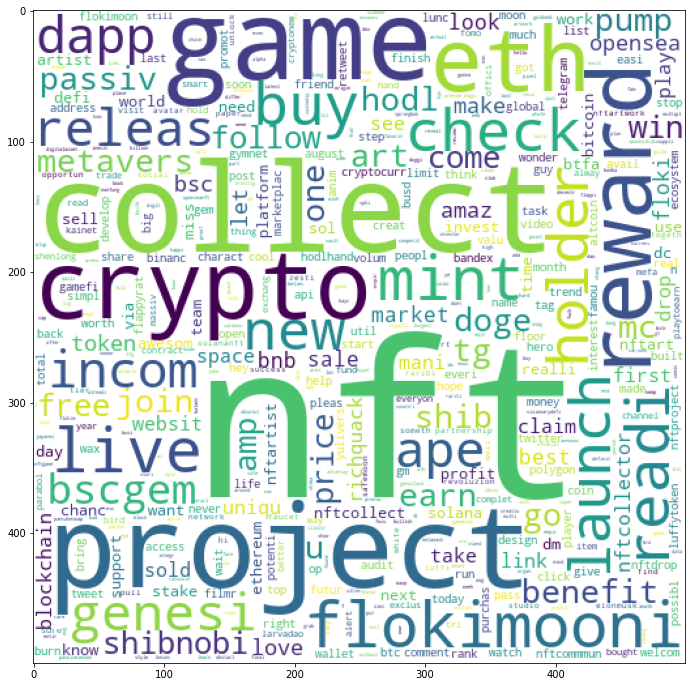

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
wordcloud=WordCloud(background_color="white",collocations=False,max_words=500,width=500,height=500).generate(" ".join(test_data["tweet_text1"]))
plt.imshow(wordcloud)

In [31]:
X=data["tweet_text1"]
y=data["tweet_intent"]
test_data_final=test_data["tweet_text1"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

Method1: Converting text file to numerical data using count vectorizer(bag of words)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vt = CountVectorizer(analyzer="word")
data1_count=vt.fit_transform(data1["tweet_text1"])
#X_train_count=vt.fit_transform(X_train)
X_train_count=vt.transform(X_train)
X_test_count=vt.transform(X_test)
test_data_count=vt.transform(test_data_final)

In [106]:
print(X_train_count.shape)
print(X_test_count.shape)
print(test_data_count.shape)

(86727, 29545)
(9637, 29545)
(31089, 29545)


Method2:Converting text data to numerical data using tf-idf (term freq * inv doc freq)

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
data1_tfidf=vect.fit_transform(data1["tweet_text1"])
X_train_tfidf = vect.transform(X_train)
X_test_tfidf=vect.transform(X_test)
test_data_tfidf=vect.transform(test_data_final)

In [142]:
X_train_tfidf.shape

(86727, 14384)

Model1:i Using Naive Bayes Approach on both count_Vectorizer

In [133]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()
mnb.fit(X_train_count,y_train)
bnb.fit(X_train_count,y_train)
#gnb.fit(X_train_count,y_train)

BernoulliNB()

In [116]:
y_pred_bnb=bnb.predict(X_test_count)
y_pred_mnb=mnb.predict(X_test_count)

In [117]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_bnb,y_test))
print(accuracy_score(y_pred_bnb,y_test))
print(accuracy_score(y_pred_mnb,y_test))

[[1562  206  272  124   18    0   14  106    1]
 [  52 3628    6   10    5    1    6   50    0]
 [   0    3   24    2    0    0    0    1    0]
 [  42  317    7 1926    4    1    3  118   10]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0   16    0    0  449   22    0]
 [   5   17    3   12    1    8    6  546   10]
 [   0    0    0    0    0    0    0    1   22]]
0.8464252360693162
0.88357372626336


In [121]:
test_data_predict_mnb=mnb.predict(test_data_count)
test_data_predict_bnb=bnb.predict(test_data_count)
print(accuracy_score(test_data_predict_bnb,test_data_predict_mnb))

0.6952619897713017


Model1:ii Using Naive Bayes Approach on tf-idf vectorizer

In [143]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()
mnb.fit(X_train_tfidf,y_train)
bnb.fit(X_train_tfidf,y_train)

BernoulliNB()

In [144]:
y_pred_bnb=bnb.predict(X_test_tfidf)
y_pred_mnb=mnb.predict(X_test_tfidf)

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_bnb,y_test))
print(accuracy_score(y_pred_bnb,y_test))
print(accuracy_score(y_pred_mnb,y_test))

[[1580  200  273  111   20    0   22   82    0]
 [  40 3589    2   11    5    1    1   44    0]
 [   1   14   24    9    0    0    2   17    0]
 [  33  340    7 1934    3    1    3  120    8]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   1    0    2   11    0    0  445   23    0]
 [   6   28    4   14    0    8    5  557    3]
 [   0    0    0    0    0    0    0    1   32]]
0.8468403029988586
0.8491231711113417


In [129]:
test_data_predict_mnb=mnb.predict(test_data_tfidf)
test_data_predict_bnb=bnb.predict(test_data_tfidf)
print(accuracy_score(test_data_predict_bnb,test_data_predict_mnb))

0.525073177007945


Method3:Using keras Tokenizer

In [158]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=500,char_level=False,oov_token="OOV")
tokenizer.fit_on_texts(data1["tweet_text1"])

In [159]:
word_index = tokenizer.word_index
len(word_index)

29565

In [160]:
sequences=tokenizer.texts_to_sequences(X_train)
X_train_seq=pad_sequences(sequences,maxlen=50,padding="post",truncating="post")
sequences1=tokenizer.texts_to_sequences(X_test)
X_test_seq=pad_sequences(sequences1,maxlen=50,padding="post",truncating="post")
sequences2=tokenizer.texts_to_sequences(test_data_final)
test_data_seq=pad_sequences(sequences2,maxlen=50,padding="post",truncating="post")

In [161]:
X_test_seq.shape

(9637, 50)

In [162]:
from keras.models import Sequential
from keras.layers import LSTM,Embedding,Dense

model=Sequential()
model.add(Embedding(5000,30,input_length=50))
model.add(LSTM(15,dropout=0.5))
model.add(Dense(9,activation="softmax"))

In [164]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
early_stopping=keras.callbacks.EarlyStopping(monitor="accuracy",
                                             patience=2,verbose=1)
history=model.fit(X_train_seq,y_train,epochs=15,batch_size=32,
                  callbacks=early_stopping)

Epoch 1/15
2711/2711 [==============================] - 63s 23ms/step - loss: 1.3279 - accuracy: 0.4828
Epoch 2/15
2711/2711 [==============================] - 60s 22ms/step - loss: 1.2856 - accuracy: 0.4818
Epoch 3/15
2711/2711 [==============================] - 61s 22ms/step - loss: 1.3311 - accuracy: 0.4867
Epoch 4/15
2711/2711 [==============================] - 60s 22ms/step - loss: 0.9040 - accuracy: 0.6887
Epoch 5/15
2711/2711 [==============================] - 60s 22ms/step - loss: 0.6312 - accuracy: 0.8094
Epoch 6/15
2711/2711 [==============================] - 60s 22ms/step - loss: 0.4069 - accuracy: 0.8899
Epoch 7/15
2711/2711 [==============================] - 60s 22ms/step - loss: 0.3395 - accuracy: 0.9032
Epoch 8/15
2711/2711 [==============================] - 60s 22ms/step - loss: 0.2733 - accuracy: 0.9285
Epoch 9/15
2711/2711 [==============================] - 61s 23ms/step - loss: 0.2260 - accuracy: 0.9405
Epoch 10/15
2711/2711 [==============================] - 61s 22m

In [165]:
model.evaluate(X_test_seq,y_test)

302/302 [==============================] - 3s 5ms/step - loss: 0.1714 - accuracy: 0.9529


[0.17138515412807465, 0.9528899192810059]

In [166]:
test_data_predict_model=np.argmax(model.predict(test_data_seq),axis=1)

Model2:Using SimpleRNN 

In [68]:
from keras.layers import SimpleRNN
model1=Sequential()
model1.add(Embedding(5000,30,input_length=50))
model1.add(SimpleRNN(15,return_sequences=True))
model1.add(SimpleRNN(15,return_sequences=True))
model1.add(SimpleRNN(15))
model1.add(Dense(9,activation="softmax"))

In [71]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history1=model1.fit(X_train_seq,y_train,epochs=15,batch_size=128,callbacks=early_stopping)

Epoch 1/15
678/678 [==============================] - 24s 32ms/step - loss: 0.3728 - accuracy: 0.9011
Epoch 2/15
678/678 [==============================] - 21s 31ms/step - loss: 0.2706 - accuracy: 0.9260
Epoch 3/15
678/678 [==============================] - 21s 32ms/step - loss: 0.2390 - accuracy: 0.9331
Epoch 4/15
678/678 [==============================] - 22s 32ms/step - loss: 0.2169 - accuracy: 0.9384
Epoch 5/15
678/678 [==============================] - 21s 32ms/step - loss: 0.2064 - accuracy: 0.9411
Epoch 6/15
678/678 [==============================] - 22s 32ms/step - loss: 0.1969 - accuracy: 0.9447
Epoch 7/15
678/678 [==============================] - 22s 32ms/step - loss: 0.1899 - accuracy: 0.9470
Epoch 8/15
678/678 [==============================] - 22s 32ms/step - loss: 0.1861 - accuracy: 0.9480
Epoch 9/15
678/678 [==============================] - 21s 32ms/step - loss: 0.1797 - accuracy: 0.9501
Epoch 10/15
678/678 [==============================] - 21s 32ms/step - loss: 0.176

In [72]:
model1.evaluate(X_test_seq,y_test)

302/302 [==============================] - 3s 9ms/step - loss: 0.1998 - accuracy: 0.9441


[0.19984009861946106, 0.9440697431564331]

In [73]:
test_data_predict_model1=np.argmax(model1.predict(test_data_seq),axis=1)

In [76]:
#using Conv1D
from keras import regularizers
model2=Sequential()
model2.add(Embedding(5000,30,input_length=50))
model2.add(keras.layers.Conv1D(20,6,activation="relu",
                  kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),
                  bias_regularizer=regularizers.l2(2e-3)))
model2.add(keras.layers.MaxPooling1D(5))
model2.add(keras.layers.Conv1D(20,6,activation="relu",
                  kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),
                  bias_regularizer=regularizers.l2(2e-3)))
model2.add(keras.layers.GlobalMaxPooling1D())
model2.add(Dense(9,activation="softmax"))

In [77]:
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history2=model2.fit(X_train_seq,y_train,epochs=15,
                    batch_size=128,callbacks=early_stopping)

Epoch 1/15
678/678 [==============================] - 8s 11ms/step - loss: 1.1465 - accuracy: 0.7108
Epoch 2/15
678/678 [==============================] - 8s 11ms/step - loss: 0.5287 - accuracy: 0.8969
Epoch 3/15
678/678 [==============================] - 8s 12ms/step - loss: 0.3815 - accuracy: 0.9322
Epoch 4/15
678/678 [==============================] - 8s 12ms/step - loss: 0.3247 - accuracy: 0.9397
Epoch 5/15
678/678 [==============================] - 8s 12ms/step - loss: 0.2922 - accuracy: 0.9466
Epoch 6/15
678/678 [==============================] - 8s 12ms/step - loss: 0.2752 - accuracy: 0.9484
Epoch 7/15
678/678 [==============================] - 8s 12ms/step - loss: 0.2649 - accuracy: 0.9492
Epoch 8/15
678/678 [==============================] - 8s 12ms/step - loss: 0.2569 - accuracy: 0.9503
Epoch 9/15
678/678 [==============================] - 8s 12ms/step - loss: 0.2500 - accuracy: 0.9508
Epoch 10/15
678/678 [==============================] - 8s 12ms/step - loss: 0.2447 - accura

In [78]:
model2.evaluate(X_test_seq,y_test)

302/302 [==============================] - 1s 2ms/step - loss: 0.2347 - accuracy: 0.9498


[0.2346941977739334, 0.9497768878936768]

In [79]:
test_data_predict_model2=np.argmax(model2.predict(test_data_seq),axis=1)

In [83]:
print(accuracy_score(test_data_predict_model2,test_data_predict_model1))
print(accuracy_score(test_data_predict_model2,test_data_predict_model))
print(accuracy_score(test_data_predict_model1,test_data_predict_model))

0.4253594518961691
0.3916497796648332
0.3836083502203352


In [ ]:
#debugging

In [96]:
corpus = [
  'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
 ]
test_string=["Hyde Ahmend USA "]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X1=vectorizer.transform(test_string)
print(X1.toarray())


[[0 0 0 0 0 0 0 0 0]]


In [139]:
corpus = [
  'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
 ]
test_string=["Hyde Ahmend USA "]
vectorizer = TfidfVectorizer(stop_words='english',  min_df=0)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
X1=vectorizer.transform(test_string)
print(X.toarray())


['document' 'second']
[[1.         0.        ]
 [0.78722298 0.61666846]
 [0.         0.        ]
 [1.         0.        ]]


In [149]:
corpus = [
  'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
 ]
test_string=["Hyde Ahmend USA "]
tokenizer=Tokenizer(num_words=500,char_level=False,oov_token="OOV")
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
word_index


{'OOV': 1,
 'this': 2,
 'is': 3,
 'the': 4,
 'document': 5,
 'first': 6,
 'second': 7,
 'and': 8,
 'third': 9,
 'one': 10}

In [156]:
sequences=tokenizer.texts_to_sequences(corpus)
X = pad_sequences(sequences)
print(vectorizer.get_feature_names_out())
X


['document' 'second']


array([[ 0,  2,  3,  4,  6,  5],
       [ 2,  5,  3,  4,  7,  5],
       [ 8,  2,  3,  4,  9, 10],
       [ 0,  3,  2,  4,  6,  5]], dtype=int32)